**Homework 2**
Nick Morse
10/3/2022

Update this notebook so that the accuracy is improved. How high can you get it? You could change things directly in the notebook, such as increasing the number of epochs, changing the learning weight, changing the width of the hidden layer, etc. If you're more ambitious, you could also try changing the model definition itself by checking out the associated Python files. For example, you could add more layers to the network. The current notebook has a training accuracy of about 43%, but will vary with randomness.

Initially, I began increasing the learning rate until the point where the accuracy would jump up and down between epochs. The limit of the learning rate for this strategy was around 0.3, which produced an accuracy of up to 90 percent. This was also helped by increasing the number of epochs from 10 to 20, which was done since the loss graph showed that slope of the loss between iterations had not leveled off at 10 epochs. Dynamic learning rate adjustments per epoch using an exponential decay did not seem to improve the training accuracy. 

Finally, the batch size was lowered by trying different sizes from the initial size of 10000 down to 5000, 2000, and 1000. Decreasing the batch size down to 1000 was found to increase the initial rate of accuracy increase per epoch, as well as increasing the final training accuracy after all epochs were completed. The final accuracy achieved for this exercise is 97 percent after 20 epochs.

In [1]:
# Clone GitHub repo within Google Colab notebook for access to fc_net
# This is not required on local machine with access to repository files
!git clone https://github.com/argonne-lcf/ai-science-training-series.git
%cd ai-science-training-series/02_neural_networks_python/

Cloning into 'ai-science-training-series'...
remote: Enumerating objects: 1870, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1870 (delta 6), reused 16 (delta 0), pack-reused 1847
Receiving objects: 100% (1870/1870), 208.15 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (902/902), done.
Checking out files: 100% (244/244), done.
/content/ai-science-training-series/02_neural_networks_python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

In [4]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


In [6]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license

# Need to run this on a computer instead of Google Colab to have it properly load the whole github folder
from fc_net import TwoLayerNet

In [25]:
num_features = x_train.shape[1] # this is the number of pixels
# The weights are initialized from a normal distribution with standard deviation weight_scale
model_fixed = TwoLayerNet(input_dim=num_features, hidden_dim=300, num_classes=nb_classes, weight_scale=.01)

In [19]:
# here you can take a look if you want at the initial loss from an untrained network
loss, gradients = model.loss(x_train, y_train_onehot)

In [9]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights
    return model

In [10]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    model = sgd(model, gradients, learning_rate)
    return loss, model

In [11]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    acc = (true_values == predictions).sum() / N
    return acc

epoch 0, loss 0.51811, accuracy 0.86, learning rate 0.300
epoch 1, loss 0.39008, accuracy 0.89, learning rate 0.300
epoch 2, loss 0.30067, accuracy 0.91, learning rate 0.300
epoch 3, loss 0.30470, accuracy 0.92, learning rate 0.300
epoch 4, loss 0.28606, accuracy 0.92, learning rate 0.300
epoch 5, loss 0.23273, accuracy 0.93, learning rate 0.300
epoch 6, loss 0.25772, accuracy 0.93, learning rate 0.300
epoch 7, loss 0.23341, accuracy 0.94, learning rate 0.300
epoch 8, loss 0.20989, accuracy 0.94, learning rate 0.300
epoch 9, loss 0.17283, accuracy 0.94, learning rate 0.300
epoch 10, loss 0.18512, accuracy 0.95, learning rate 0.300
epoch 11, loss 0.14162, accuracy 0.95, learning rate 0.300
epoch 12, loss 0.17271, accuracy 0.95, learning rate 0.300
epoch 13, loss 0.19656, accuracy 0.96, learning rate 0.300
epoch 14, loss 0.14874, accuracy 0.96, learning rate 0.300
epoch 15, loss 0.18060, accuracy 0.96, learning rate 0.300
epoch 16, loss 0.14858, accuracy 0.96, learning rate 0.300
epoch 1

0.9663

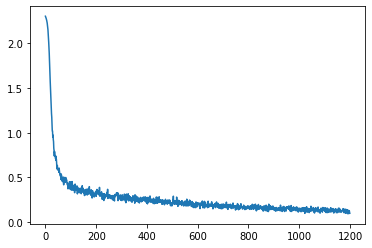

In [52]:
# Here's an example training loop using this two-layer model. Can you do better? 
learning_rate = 0.3   # initial: 0.01
batch_size = 1000     # initial: 10000
num_epochs = 20       # initial: 10


num_examples = x_train.shape[0]
num_batches = int(num_examples / batch_size)
losses = numpy.zeros(num_batches*num_epochs,)
indices = numpy.arange(num_examples)



# INITIALIZE: Make a copy of a fixed initial model for meaningful back-to-back comparisons
import copy
model = copy.deepcopy(model_fixed)
#print(id(model), id(model_fixed))

i = 0
for epoch in range(0, num_epochs):

    # Adjust learning rate
    #learning_rate = learning_rate*numpy.exp(-0.01 * epoch)


    # in each epoch, we loop over all of the training examples
    for step in range(0, num_batches):


        # grabbing the next batch
        offset = step * batch_size
        batch_range = range(offset, offset+batch_size)
        x_train_batch = x_train[batch_range, :]
        y_train_batch = y_train_onehot[batch_range,:]
        
        # feed the next batch in to do one sgd step
        loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
        losses[i] = loss
        i += 1

    acc = accuracy(model, x_train, y_train)
    print("epoch %d, loss %.5f, accuracy %.2f, learning rate %.3f" % (epoch, loss, acc, learning_rate))
    
    # reshuffle the data so that we get a new set of batches
    numpy.random.shuffle(indices)
    x_train = x_train[indices,:]
    y_train = y_train[indices] # keep this shuffled the same way for use in accuracy calculation
    y_train_onehot = y_train_onehot[indices,:]
plt.plot(losses)

accuracy(model, x_train, y_train)